### Feature selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
data = pd.read_csv("mobile-price-classification//train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
len(data)

2000

- battery_power: Total energy a battery can store in one time measured in mAh
    
- blue: Has Bluetooth or not

- clock_speed: the speed at which microprocessor executes instructions

- dual_sim: Has dual sim support or not

- fc: Front Camera megapixels

- four_g: Has 4G or not

- int_memory: Internal Memory in Gigabytes

- m_dep: Mobile Depth in cm

- mobile_wt: Weight of mobile phone

- n_cores: Number of cores of the processor

- pc: Primary Camera megapixels

- px_height: Pixel Resolution Height

- px_width: Pixel Resolution Width

- ram: Random Access Memory in MegaBytes

- sc_h: Screen Height of mobile in cm

- sc_w: Screen Width of mobile in cm

- talk_time: the longest time that a single battery charge will last when you are

- three_g: Has 3G or not

- touch_screen: Has touch screen or not

- wifi: Has wifi or not

- price_range: This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [ ]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#### Univariate Selection

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


#### Feature Importance

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06026649 0.0201948  0.03845702 0.02036605 0.03572264 0.0147269
 0.03863371 0.03553624 0.03982315 0.0349913  0.03625639 0.05047826
 0.05273353 0.35633539 0.03780415 0.03919298 0.03415673 0.01515728
 0.01654212 0.0226249 ]


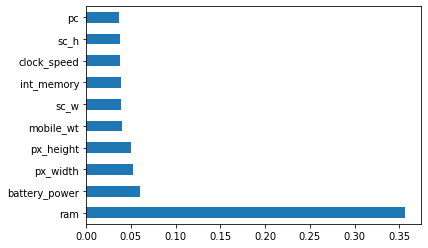

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation Matrix with Heatmap

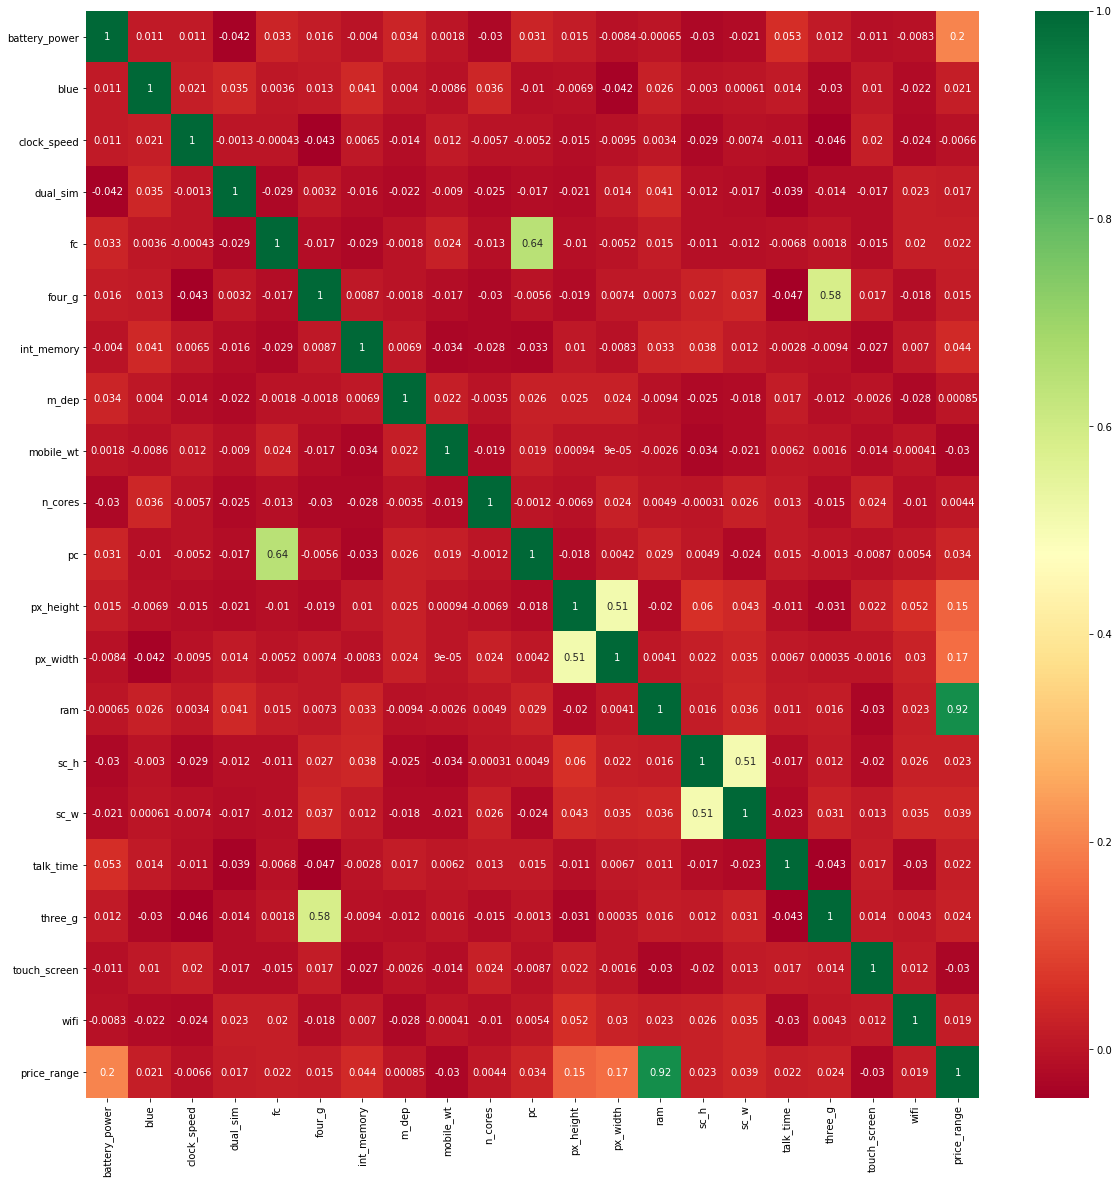

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Select From Model

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [ ]:
clf = LassoCV(cv=5)

In [ ]:
sfm = SelectFromModel(clf) #threshold=0.4
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
n_features = sfm.transform(X).shape[1]

In [ ]:
n_features

4

In [ ]:
sfm.transform(X)

array([[ 842.,   20.,  756., 2549.],
       [1021.,  905., 1988., 2631.],
       [ 563., 1263., 1716., 2603.],
       ...,
       [1911.,  868., 1632., 3057.],
       [1512.,  336.,  670.,  869.],
       [ 510.,  483.,  754., 3919.]])

In [ ]:
sfm.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False])

In [ ]:
pd.series(sfm.estimator_,feature_importances_,.ravel()).hist()